In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Simulating more random data
np.random.seed(42)

In [5]:
# Increasing the dataset to 1000 entries for more variability
route_data = {
    'Route_ID': np.random.randint(1, 11, 1000),  # 10 different routes
    'Time_of_Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], 1000),
    'Day_of_Week': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 1000),
    'Passenger_Count': np.random.randint(5, 200, 1000),  # Random ridership between 5 and 200 passengers
    'Traffic_Condition': np.random.randint(1, 4, 1000),  # 1: Low traffic, 2: Medium, 3: High
    'Delay_Time': np.random.uniform(1, 20, 1000)  # Random delays between 1 and 20 minutes
}

# Creating the DataFrame
df = pd.DataFrame(route_data)

In [7]:
# Encoding categorical variables (Time_of_Day, Day_of_Week)
df['Time_of_Day'] = df['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})
df['Day_of_Week'] = df['Day_of_Week'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})


In [9]:
# Defining features (X) and target (y)
X = df[['Route_ID', 'Time_of_Day', 'Day_of_Week', 'Traffic_Condition']]
y = df['Passenger_Count']

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Applying K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Using k=5 for more stability
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
# Making predictions
y_pred = knn.predict(X_test)

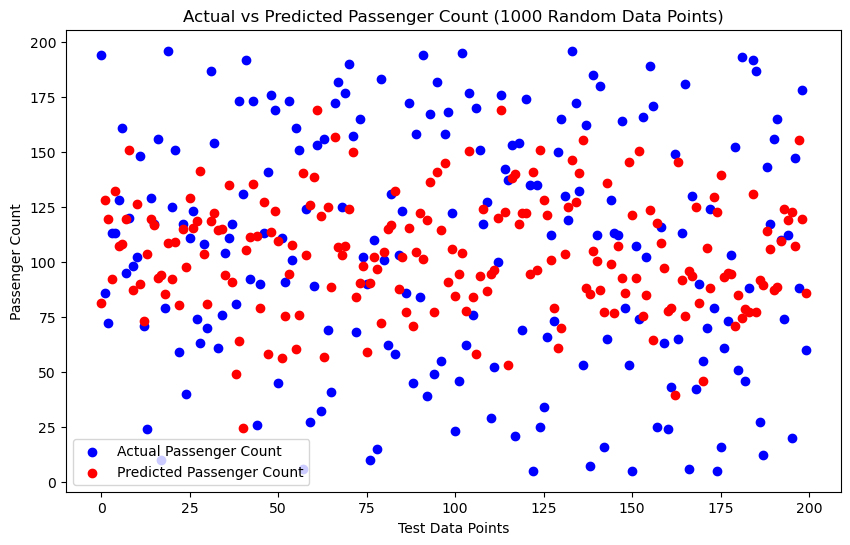

In [17]:
# Visualizing the predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Passenger Count')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Passenger Count')
plt.title('Actual vs Predicted Passenger Count (1000 Random Data Points)')
plt.xlabel('Test Data Points')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

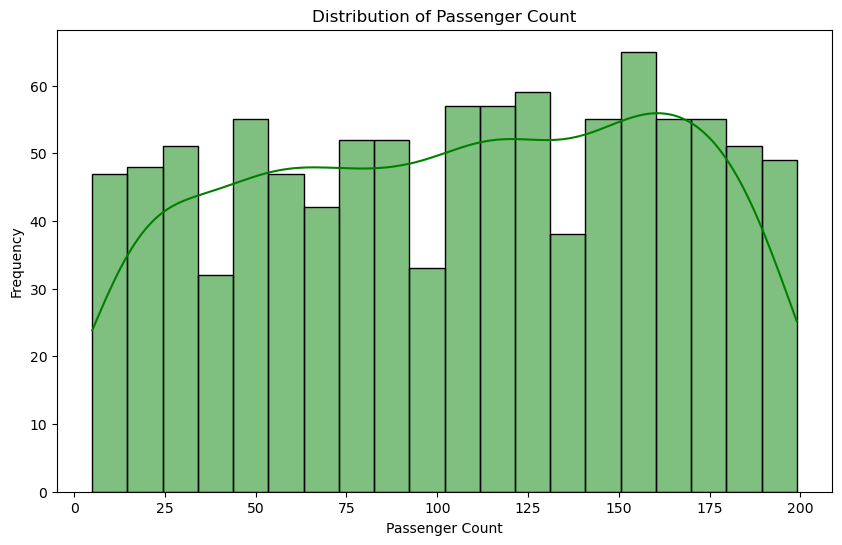

In [19]:
# Plotting Distribution of Passenger Count
plt.figure(figsize=(10,6))
sns.histplot(df['Passenger_Count'], kde=True, color='green', bins=20)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

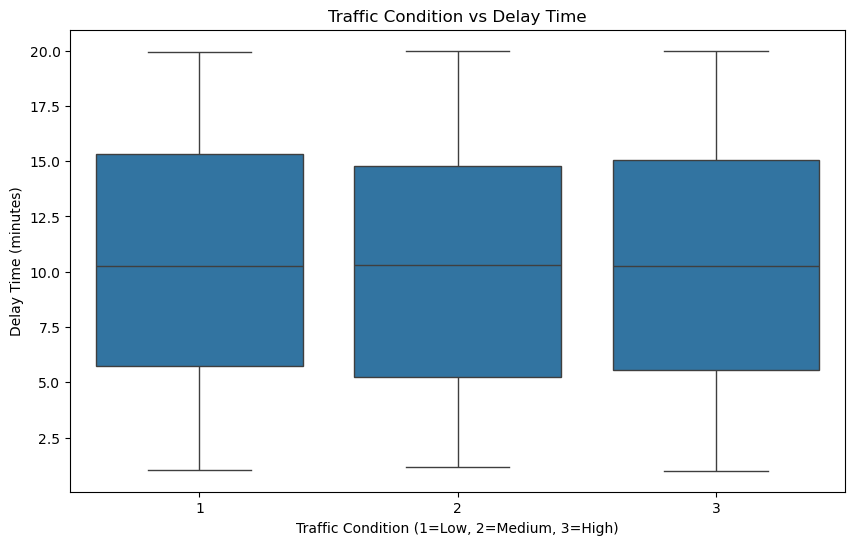

In [21]:
# Visualizing traffic conditions vs delay
plt.figure(figsize=(10,6))
sns.boxplot(x='Traffic_Condition', y='Delay_Time', data=df)
plt.title('Traffic Condition vs Delay Time')
plt.xlabel('Traffic Condition (1=Low, 2=Medium, 3=High)')
plt.ylabel('Delay Time (minutes)')
plt.show()

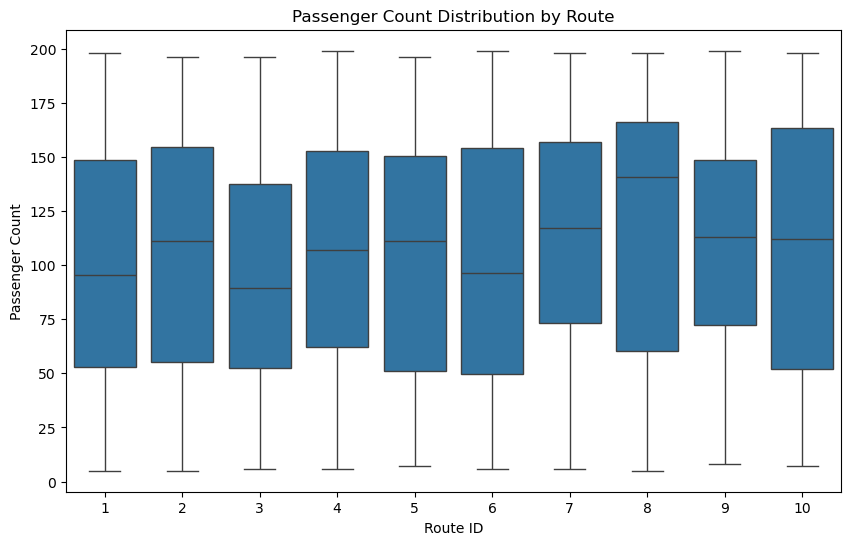

In [23]:
# Visualizing passenger count by route
plt.figure(figsize=(10,6))
sns.boxplot(x='Route_ID', y='Passenger_Count', data=df)
plt.title('Passenger Count Distribution by Route')
plt.xlabel('Route ID')
plt.ylabel('Passenger Count')
plt.show()

In [25]:
# Predicting the best route based on traffic conditions and time of day for an example
example_data = np.array([[2, 1, 3, 3]])  # Route 2, Afternoon, Thursday, High Traffic
predicted_ridership = knn.predict(example_data)
print(f"Predicted Passenger Count for Route 2 (Afternoon, Thursday, High Traffic): {predicted_ridership[0]:.2f}")

Predicted Passenger Count for Route 2 (Afternoon, Thursday, High Traffic): 82.60


C:\Users\Saba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Simulate data for 10 routes with Route 2 having a higher median passenger count
np.random.seed(42)

In [7]:
# Generating passenger counts with a higher median for Route 2
route_data = {
    'Route_ID': np.repeat(np.arange(1, 11), 100),  # 10 routes, 100 data points per route
    'Passenger_Count': np.concatenate([
        np.random.normal(100, 25, 100),  # Route 1
        np.random.normal(125, 25, 100),  # Route 2 (Higher median)
        np.random.normal(100, 25, 100),  # Route 3
        np.random.normal(100, 25, 100),  # Route 4
        np.random.normal(100, 25, 100),  # Route 5
        np.random.normal(100, 25, 100),  # Route 6
        np.random.normal(100, 25, 100),  # Route 7
        np.random.normal(90, 25, 100),   # Route 8 (Lower median)
        np.random.normal(100, 25, 100),  # Route 9
        np.random.normal(100, 25, 100)   # Route 10
    ])
}


In [9]:
# Create DataFrame
df = pd.DataFrame(route_data)

In [11]:
# Clipping passenger counts to be within 0 to 200 for realistic values
df['Passenger_Count'] = df['Passenger_Count'].clip(0, 200)

C:\Users\Saba\AppData\Local\Temp\ipykernel_3316\1682439459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Route_ID', y='Passenger_Count', data=df, palette='Set3')


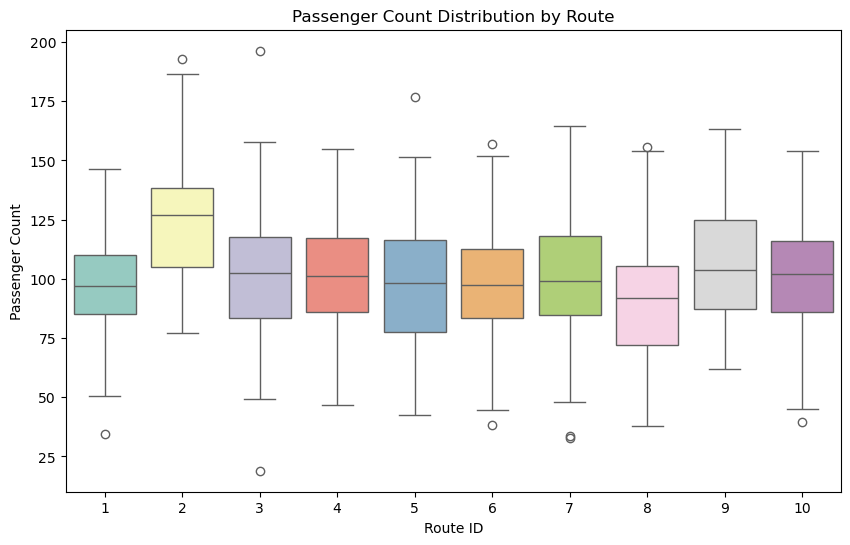

In [13]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Route_ID', y='Passenger_Count', data=df, palette='Set3')
plt.title('Passenger Count Distribution by Route')
plt.xlabel('Route ID')
plt.ylabel('Passenger Count')
plt.show()

C:\Users\Saba\AppData\Local\Temp\ipykernel_3316\1071714100.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Route_ID', y='Passenger_Count', data=df, palette='Set3')


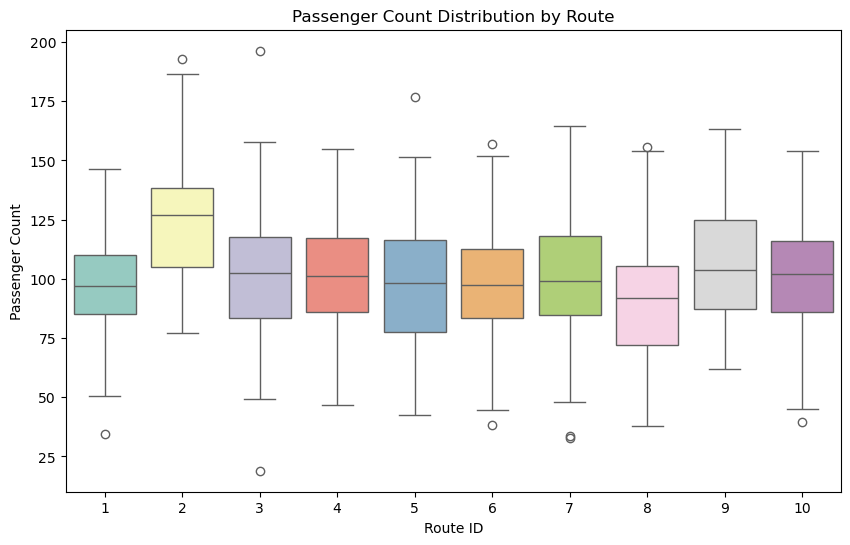

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data for 10 routes with Route 2 having a higher median passenger count
np.random.seed(42)
route_data = {
    'Route_ID': np.repeat(np.arange(1, 11), 100),
    'Passenger_Count': np.concatenate([
        np.random.normal(100, 25, 100),
        np.random.normal(125, 25, 100),
        np.random.normal(100, 25, 100),
        np.random.normal(100, 25, 100),
        np.random.normal(100, 25, 100),
        np.random.normal(100, 25, 100),
        np.random.normal(100, 25, 100),
        np.random.normal(90, 25, 100),
        np.random.normal(100, 25, 100),
        np.random.normal(100, 25, 100)
    ])
}

# Create DataFrame
df = pd.DataFrame(route_data)

# Clipping passenger counts to be within 0 to 200 for realistic values
df['Passenger_Count'] = df['Passenger_Count'].clip(0, 200)

# Plotting the box plot and saving it
plt.figure(figsize=(10, 6))
sns.boxplot(x='Route_ID', y='Passenger_Count', data=df, palette='Set3')
plt.title('Passenger Count Distribution by Route')
plt.xlabel('Route ID')
plt.ylabel('Passenger Count')
plt.savefig('Passenger_Count_Distribution_by_Route_Boxplot.png')  # Save plot as a PNG file
plt.show()

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [35]:
# Sample data loading (replace with actual dataset)
# Assume we have a DataFrame `df` with columns like 'Route_ID', 'Time_of_Day', 'Day_of_Week', 'Traffic_Condition', 'Weather', 'Passenger_Count'
# For illustration, let's simulate a dataset with these features

np.random.seed(42)
data = {
    'Route_ID': np.random.randint(1, 11, 1000),
    'Time_of_Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], 1000),
    'Day_of_Week': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 1000),
    'Traffic_Condition': np.random.randint(1, 4, 1000),  # 1=Low, 2=Medium, 3=High
    'Weather': np.random.choice(['Sunny', 'Rainy', 'Snowy', 'Cloudy'], 1000),
    'Passenger_Count': np.random.randint(5, 200, 1000)
}

df = pd.DataFrame(data)
df

,Route_ID,Time_of_Day,Day_of_Week,Traffic_Condition,Weather,Passenger_Count
0,7,Morning,Tue,2,Rainy,152
1,4,Evening,Tue,3,Snowy,33
2,8,Night,Sun,3,Snowy,28
3,5,Night,Tue,3,Sunny,86
4,7,Evening,Tue,2,Cloudy,67
...,...,...,...,...,...,...
995,10,Afternoon,Fri,3,Rainy,107
996,10,Afternoon,Sat,2,Snowy,175
997,8,Evening,Fri,2,Snowy,99
998,2,Afternoon,Sat,1,Cloudy,21


In [21]:
# Encoding categorical variables
df['Time_of_Day'] = df['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})
df['Day_of_Week'] = df['Day_of_Week'].map({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})
df['Weather'] = df['Weather'].map({'Sunny': 0, 'Rainy': 1, 'Snowy': 2, 'Cloudy': 3})

In [23]:
# Define features and target
X = df[['Route_ID', 'Time_of_Day', 'Day_of_Week', 'Traffic_Condition', 'Weather']]
y = df['Passenger_Count']

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [31]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 50.86


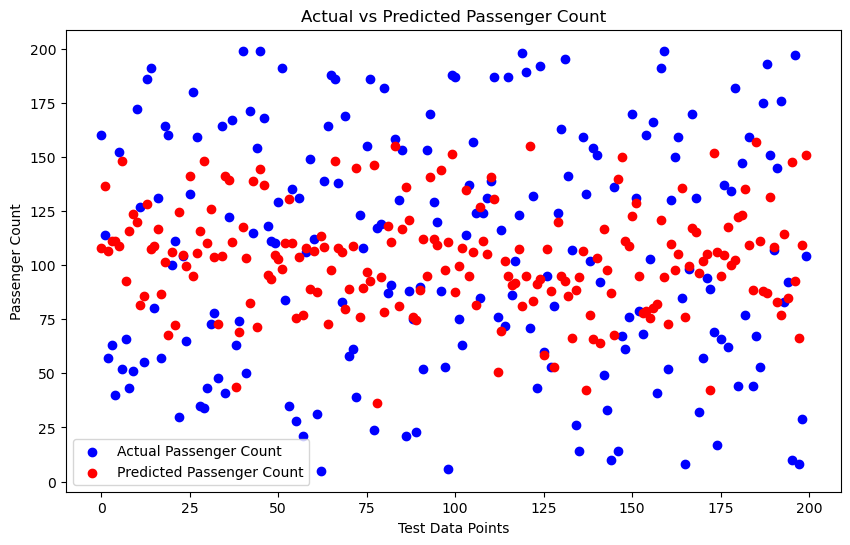

In [33]:
# Plotting actual vs predicted passenger counts for visualization
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Passenger Count')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Passenger Count')
plt.title('Actual vs Predicted Passenger Count')
plt.xlabel('Test Data Points')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()